# Customizing Plot Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use("classic")

In [2]:
%matplotlib inline
import numpy as np

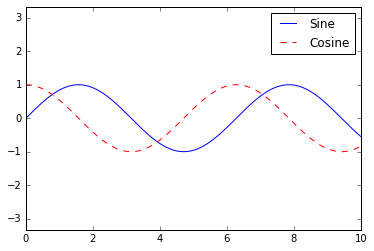

In [6]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), "-b", label="Sine")
ax.plot(x, np.cos(x), "--r", label="Cosine")
ax.axis("equal")
# Standard way to create a legend
leg = ax.legend();

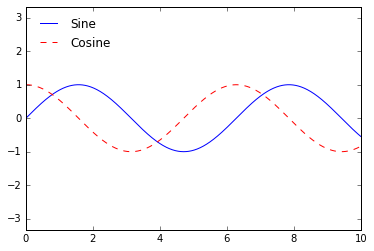

In [8]:
ax.legend(loc="upper left", frameon=False)
fig

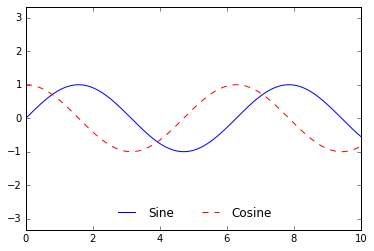

In [13]:
# You can specify the number of columns with ncol
ax.legend(frameon=False, loc="lower center", ncol=2)
fig

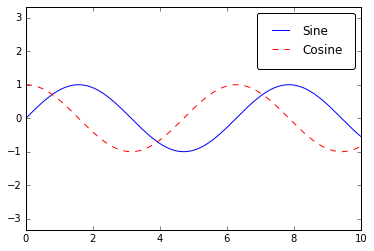

In [16]:
# And you can even change more like roundedbox, transparency, padding, etc.
ax.legend(fancybox=True, framealpha=1, shadow=False, borderpad=1)
fig

## Choosing Elements for the legend

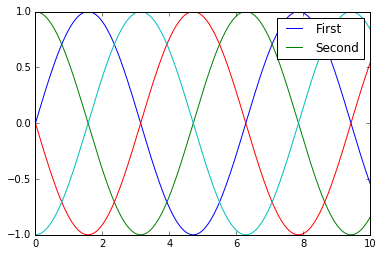

In [23]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

plt.legend(lines[:2], ["First", "Second"]);

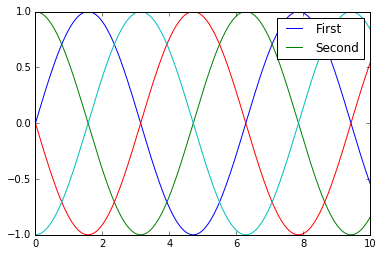

In [28]:
# Just these lines with assigned labels will be shown in the legend
plt.plot(x, y[:, 0], label="First")
plt.plot(x, y[:, 1], label="Second")
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for the size of points

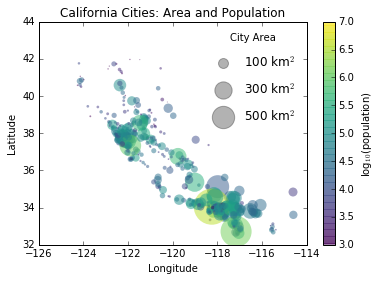

In [44]:
import pandas as pd
cities = pd.read_csv("../notebooks/data/california_cities.csv")

# Extract the data we are interested in 
lat, lon = cities["latd"], cities["longd"]
population, area = cities["population_total"], cities["area_total_km2"]

# Scatter the points using size and color without a label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap="viridis", s=area, linewidth=0, alpha=0.5)
plt.axis(aspect="equal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="log$_{10}$(population)")
plt.clim(3, 7)

# Create a legend
for area in [100, 300, 500]:
    plt.scatter([], [], c="k", alpha=0.3, s=area, label=str(area) + " km$^2$")
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="City Area")
plt.title("California Cities: Area and Population");

## Multiple Legends
It is not that easy to create more than one legends.
You can do it by creating a second one from scratch and us ``ax.add_artist()`` method

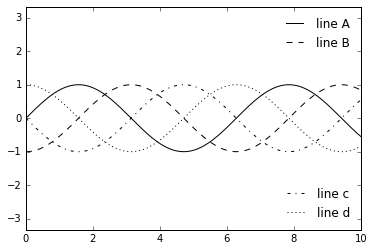

In [48]:
fig, ax = plt.subplots()

lines = []
styles = ["-", "--", "-.", ":"]
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color="black")

ax.axis("equal")

# Specify lines and labels of the first legend
ax.legend(lines[:2], ["line A", "line B"], loc="upper right", frameon=False)

# Second legend
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ["line c", "line d"], loc="lower right", frameon=False)
ax.add_artist(leg);